## Evaluation

This notebook contains several gaps that should be filled by you.

In [54]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import math
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

We will use the car price prediction that you know already from an earlier exercise.

In [29]:
dforig=pd.read_csv('AutoScout24 Dataset.csv')
df=pd.get_dummies(dforig)
df = df.drop_duplicates()
df=df[df.columns.drop(list(df.filter(regex='Name|Registration')))]
df


,Price,Mileage,Doors,Horsepower,EngineSize,Seats,Cylinders,Gears,Year,Color_anthrazit,...,Color_grau,Color_grün,Color_orange,Color_pink,Color_rot,Color_schwarz,Color_silber,Color_türkis,Color_violett,Color_weiss
0,44800,27600,2,320,4973,2,8,5,1996,1,...,0,0,0,0,0,0,0,0,0,0
1,22800,18300,4,286,4398,5,8,5,1999,1,...,0,0,0,0,0,0,0,0,0,0
2,183710,650,5,350,4172,5,8,6,2008,1,...,0,0,0,0,0,0,0,0,0,0
3,19900,32000,5,150,2198,7,4,6,2006,1,...,0,0,0,0,0,0,0,0,0,0
4,18999,118000,5,163,2401,5,5,5,2003,1,...,0,0,0,0,0,0,0,0,0,0
5,24900,70000,5,310,4172,5,8,6,2004,1,...,0,0,0,0,0,0,0,0,0,0
6,26800,92500,5,231,2979,5,6,5,2003,1,...,0,0,0,0,0,0,0,0,0,0
7,6900,166000,5,147,2429,7,4,5,2002,1,...,0,0,0,0,0,0,0,0,0,0
8,29900,75000,2,370,3217,4,8,6,2000,1,...,0,0,0,0,0,0,0,0,0,0
9,24800,86200,5,231,2979,5,6,5,2004,1,...,0,0,0,0,0,0,0,0,0,0


An important principle of evaluation is that you never evaluate on your training set. While the effect of doing so is moderate for linear methods, some nonlinear approaches like nearest neighbor are capable of (almost) exactly reproducing the values for the dependent variable. Test this for yourself.

In [30]:
# train your nearest neighbor classifier  on the entire dataset while setting the number of considered nearest neighbors to 
# one (n_neighbors=1).
X=df
X = X.drop('Price', axis=1)
y=df["Price"]
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X,y)
predictions=knn.predict(X)
R2 = r2_score(y,predictions)
RMSE=math.sqrt(mean_squared_error(y,predictions))
print ("R2: ",R2)
print ("RMSE: ",RMSE)


R2:  0.9967294945931409
RMSE:  1760.6542502609545


In contrast, if the data is split into separate training and test sets, nearest neighbor performs much worse, which you should test yourself.

In [33]:
train, test = train_test_split(df, test_size=0.2)
Xtrain = train.drop('Price', axis=1)
ytrain=train["Price"]
knn.fit(Xtrain,ytrain)
Xtest=test.drop('Price',axis=1)
ytest=test["Price"]

predictions=knn.predict(Xtest)
R2 = r2_score(ytest,predictions)
RMSE=math.sqrt(mean_squared_error(ytest,predictions))
print ("R2: ",R2)



R2:  0.7173196365748469


In [ ]:
Another important evaluation measure besides R2 und RMSE is the learning curve that shows how an approach performs with varying amount 
 of training data.  For this, the R2 values are obtained in several iterations, in which the training data is successively  extended. In order to obtain a smooth curve, the training data for a given iteration 
    should always contain all the training data belonging to previous iterations. Let us draw such a learning curve.

percentages:  [0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3, 0.325, 0.35, 0.375, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.7, 0.725]
R2s:  [0.07897340389633156, 0.13321010901378827, 0.17451970549948448, 0.2114938982701341, 0.3004206678088188, 0.33374921782099365, 0.35425305545741537, 0.3612852585253704, 0.35800590901011864, 0.3732315244343424, 0.4002421673334342, 0.41198094388093864, 0.4077519169667617, 0.42109937030924194, 0.4141666949974907, 0.4244211400206759, 0.42975838290554036, 0.42989472074083135, 0.4312382467143988, 0.4338758800637377, 0.42800870617264763, 0.4252985862408585, 0.4340237390263234, 0.43946389850863343, 0.4595886633122227, 0.4637563090757436, 0.4693047707737825, 0.4717420964629464, 0.4721262811516138]
len percentages:  29
len R2s:  29


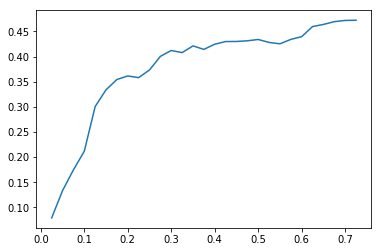

In [68]:
R2s=[]
percentages=[]
## let us use 10 neighbors now
knn=KNeighborsClassifier(n_neighbors=20)
num_rows=df.shape[0]
df=df.sample(frac=1)
for i in range(1,30):
    percentage_train=(i/40)
    test_amount_size=1.0-percentage_train
    train=df.iloc[0:round(percentage_train*num_rows)]
    test=df.iloc[round(percentage_train*num_rows):num_rows]
    #train, test = train_test_split(df, test_size=test_amount_size)
    Xtrain = train.drop('Price', axis=1)
    ytrain=train["Price"]
    knn.fit(Xtrain,ytrain)
    Xtest=test.drop('Price',axis=1)
    ytest=test["Price"]
    predictions=knn.predict(Xtest)
    R2s.append(r2_score(ytest,predictions))
    percentages.append(percentage_train)

print ("percentages: ",percentages)
print ("R2s: ",R2s)
print ("len percentages: ",len(percentages))
print ("len R2s: ",len(R2s))
plt.plot(percentages, R2s, label="Learning curve")   
plt.show()

If the data is sparse, then your evaluation metrics can become quite unreliable. In this case a technique called cross validation becomes handy. The idea behind cross validation is that you divide your data into n parts (usually n=10) and use in each iterations one part for training and all the remaining parts for testing. Let's try this out on our example dataset. Since nearest neighbor performs rather slowly on our example dataset, we instead resort to linear regression for this task.

In [65]:
regression=LinearRegression()
all_predictions=[]
# we want to do a 10-fold cross validation, thus the number of entries in the dataset has to be a multiple of 10
df=df.iloc[0:54730]

y=df["Price"]
for i in range(0,10):
    print("i: ",i)
    num_rows=df.shape[0]
    test_start=round(num_rows*(i/10))
    test_end=round(num_rows*((i+1)/10))
    test=df.iloc[test_start:test_end]
    train1=df.iloc[0:test_start]
    train2=df.iloc[test_end:num_rows]
    train12=[train1,train2]
    train=pd.concat(train12,ignore_index=True)
    Xtrain=train.drop('Price',axis=1)
    ytrain=train['Price']
    Xtest=test.drop('Price',axis=1)
    ytest=test['Price']
    regression.fit(Xtrain,ytrain)
    predictions=regression.predict(Xtest)
    all_predictions.extend(predictions)
 
print ("length y: ",len(y))
print ("all predictions: ",len(all_predictions))
print("R2: ",r2_score(y,all_predictions))



i:  0
i:  1
i:  2
i:  3
i:  4
i:  5
i:  6
i:  7
i:  8
i:  9
length y:  54730
all predictions:  54730
R2:  0.6833441842586401
